[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


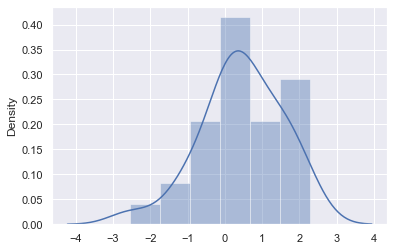

In [10]:
## Mean shift: KDE(Kernel Density Estimation)를 이용하여 데이터 포인트들이 데이터 분포가 높은 곳으로 이동하면서 군집화를 수행
## 별도의 군집화 개수를 지정하지 않으며, 자동으로 군집화 개수를 정함
## 비모수적 밀도 추정 - KDE: 개별 관측 데이터에 가우시안 커널 함수를 적용하고, 그 함수들을 합산
## Bandwidth가 작으면 오버피팅, 크면 언더피팅
## Bandwidth 크기에 따라 군집화를 수행하며, 작을수록 군집의 개수가 많아짐. 

## 단점: bandwidth에 너무 영향을 받음
## 데이터 마이닝보다는 영상, 오브젝트 트레킹쪽에 많이 쓰임

## KDE의 이해: seaborn의 distplot()을 이용하여 KDE 시각화

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)

# u=0, a^2=1인 값들 30개 랜덤으로 생성
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

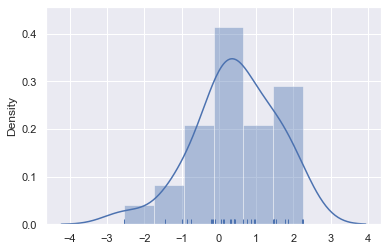

In [11]:
sns.distplot(x, rug=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

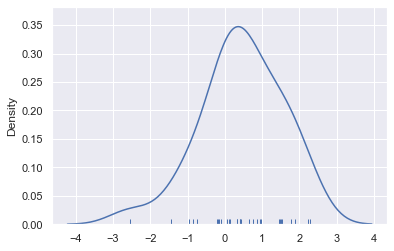

In [12]:
# 곡선이 kde임 
sns.distplot(x, hist=False, rug=True)

<AxesSubplot:ylabel='Count'>

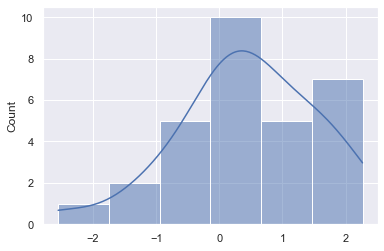

In [15]:
sns.histplot(x, kde=True)

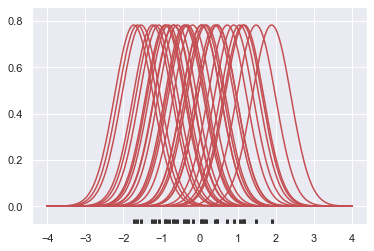

In [17]:
# 개별 관측데이터에 대해 가우시안 커널 함수 적용
from scipy import stats

x = np.random.normal(0, 1, size=30)

# 최적 bandwidth 구하는 공식에 단순 대입
bandwidth = 1.06 * x.std() * x.size ** (-1/5)

# -4~4 사이의 200개의 값을 생성(균일값)
support = np.linspace(-4,4,200)

# 개별 커널함수를 출력
kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')
    
sns.rugplot(x, color='.2', linewidth=3);

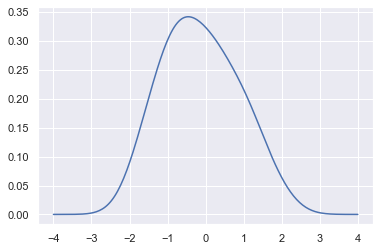

In [20]:
# 개별 커널함수를 합침
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density)

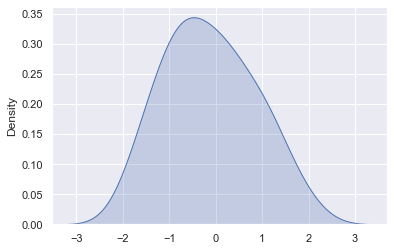

In [21]:
sns.kdeplot(x, shade=True);

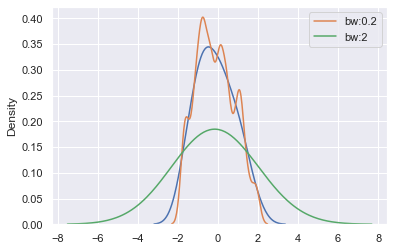

In [24]:
# bandwith 값에 따른 KDE 변화, bandwidth가 작을 수록 편차가 적다(가늘고 길다)
sns.kdeplot(x)
sns.kdeplot(x, bw_method=.2, label='bw:0.2')
sns.kdeplot(x, bw_method=2, label='bw:2')
plt.legend()

In [26]:
## 사이킷런을 이용한 mean shift
# make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성, 군집화 수행
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# X가 피쳐, y가 타겟
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)

meanshift = MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


array([5, 0, 0, 1, 4, 1, 2, 6, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 6, 3, 1, 2,
       0, 0, 3, 5, 7, 1, 5, 1, 6, 4, 1, 0, 2, 2, 0, 2, 7, 3, 2, 1, 3, 5,
       4, 4, 0, 1, 0, 0, 0, 2, 1, 5, 5, 1, 2, 2, 0, 4, 1, 5, 0, 2, 2, 1,
       2, 6, 1, 6, 7, 0, 0, 1, 5, 1, 2, 2, 2, 3, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 3, 1, 7, 0, 2, 0, 0, 1, 1, 2, 2, 4, 1, 0, 5, 5, 2, 0, 5, 6,
       0, 1, 2, 5, 0, 0, 6, 2, 1, 1, 2, 2, 1, 0, 2, 0, 3, 2, 1, 4, 1, 6,
       2, 2, 0, 2, 2, 0, 2, 1, 5, 1, 4, 2, 2, 0, 3, 3, 2, 0, 2, 3, 5, 1,
       0, 2, 2, 2, 0, 0, 6, 1, 1, 1, 0, 5, 2, 1, 2, 2, 6, 7, 5, 2, 1, 1,
       6, 3, 0, 6, 0, 1, 2, 2, 7, 6, 1, 2, 4, 4, 1, 1, 6, 2, 6, 2, 5, 2,
       0, 2], dtype=int64)

In [27]:
# bandwidth 크기를 1로 증가시킨 후 재수행시 클러스터가 줄어들음
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [29]:
# 최적의 bandwidth 값을 estimate_bandwidth()로 계산 한 뒤 재 군집화
from sklearn.cluster import estimate_bandwidth

#  KNN을 수행하는 데이터의 건수가 (총 건수 * quantile)
bandwidth = estimate_bandwidth(X, quantile=0.25)
print('bandwidth 값:', round(bandwidth, 3))

bandwidth 값: 1.689


In [30]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


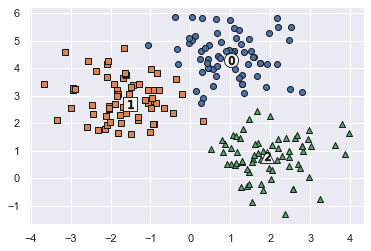

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
center = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = center[label]
    
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()
    

In [37]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64
